# 【問題1】練習のために特徴量の選択

## 1-1. train.csvの読み込み

In [1]:
import pandas as pd

train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

pd.set_option("display.max_columns", 81)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1-2. 説明変数GrLivAreaとYearBuiltの抜き出し

In [2]:
X = train[["GrLivArea", "YearBuilt"]]
X

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


## 1-3. 目的変数SalePriceの抜き出し

In [3]:
y = train[["SalePrice"]]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


## 1-4. 結合

In [4]:
df = pd.concat([X, y], axis=1)
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# 【問題2】線形回帰による推定と評価

## 2-1. 分析

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2-1-1. ジョイントプロット

/Users/teruitakahiro/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


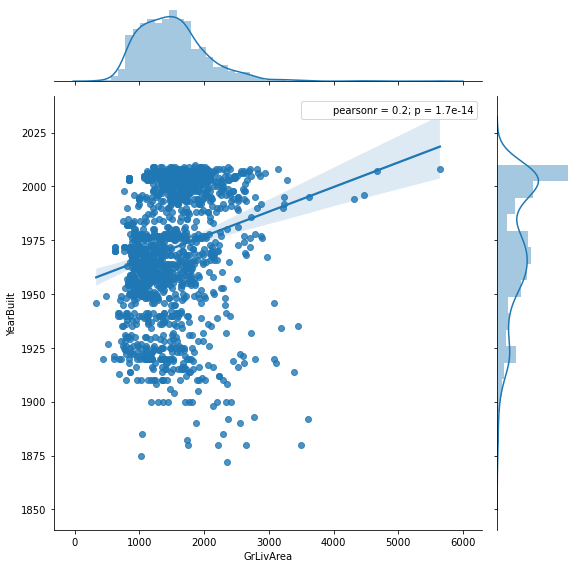

In [6]:
import scipy.stats as stats

sns.jointplot(data=df, x="GrLivArea", y = "YearBuilt", kind="reg", height=8).annotate(stats.pearsonr)

plt.show()

* 説明変数の２変数の相関係数は低め、分布も偏り気味

## 2-1-2. バブルチャート

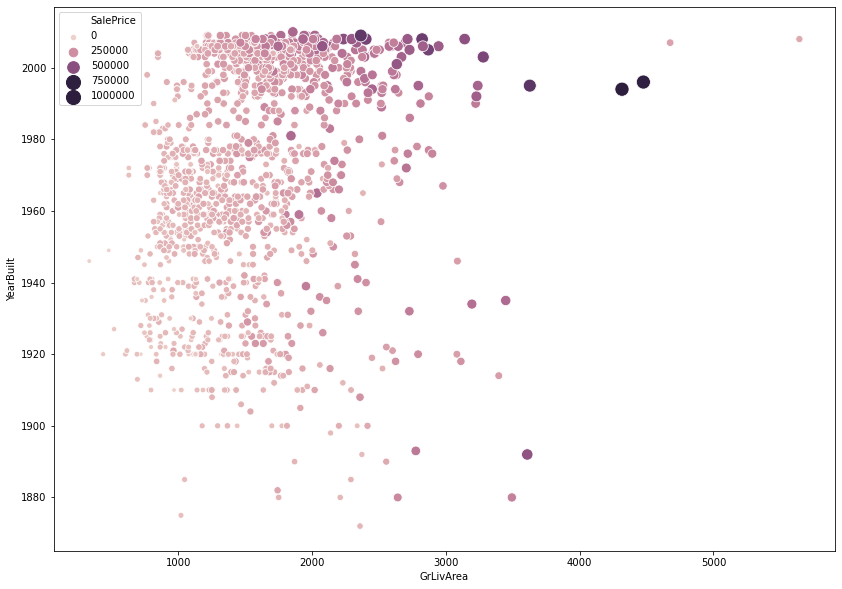

In [7]:
plt.figure(figsize=(14, 10))

sns.scatterplot(data=df, x="GrLivArea", y = "YearBuilt", hue="SalePrice", size="SalePrice", sizes=(20, 200))

plt.show()

* 全体の傾向としては、GrLivAreaとYearBuiltの値が高くなれば、目的変数のSalePriceの値も高くなる傾向。
* 右上に２点、外れ値の存在が確認できる。

## 2-2. 前処理

### 2-2-1. 検証データ分割

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X_ndarray = X.values
y_ndarray = y.values

X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, test_size=0.25, random_state=1)

### 2-2-2. スケーリング（標準化）

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # 学習データのみで fit

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

print(X_train[:5])
print(X_test[:5])

[[ 0.32320933  1.07134974]
 [ 0.1004104  -1.59979674]
 [ 0.82167474 -0.84132305]
 [ 0.52901512 -0.47857476]
 [-0.67749774 -0.08284936]]
[[ 0.50824573  0.97241838]
 [ 1.26349635 -1.07216287]
 [-1.17596315 -0.14880359]
 [-1.68575732 -0.04987224]
 [-0.6321827  -0.41262053]]


## 2-3. 学習〜可視化まで

### 2-3-1. 学習（線形回帰）

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[[48151.94967018 31530.5206632 ]]
[182319.75707763]


### 2-3-2. 推定

In [11]:
y_pred = reg.predict(X_test)

print(y_pred[:5])

[[237453.63793174]
 [209353.71627706]
 [121002.98391529]
 [ 99574.75779957]
 [138868.78722852]]


### 2-3-3. 評価（MSE）

In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE on test set: {:.4f}".format(mse))

MSE on test set: 1886785549.9600


In [13]:
# RMSE

rmse = np.sqrt(mse)
print("RMSE on test set: {:.4f}".format(rmse))

RMSE on test set: 43437.1448


In [14]:
# MAE

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set: {:.4f}".format(mae))

MAE on test set: 29912.6772


In [15]:
# DF化

eval_dict = {"MSE": [mse], "RMSE": [rmse], "MAE": [mae]}
eval_df = pd.DataFrame(eval_dict, index=["Score"])
eval_df

,MSE,RMSE,MAE
Score,1.886786e+09,43437.144818,29912.677209


### 2-3-4. 可視化

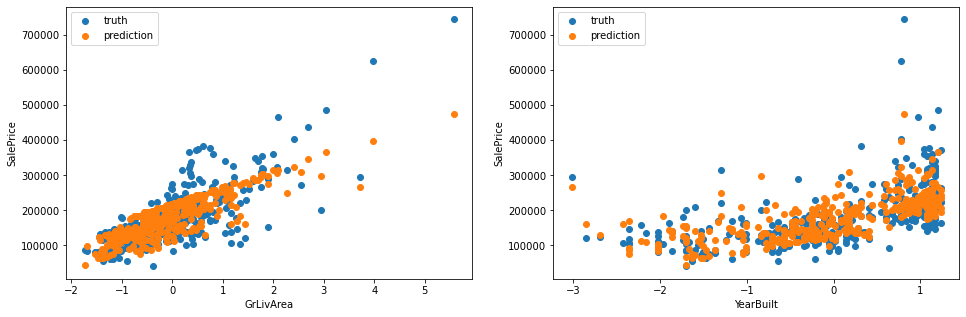

In [16]:
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_test, label="truth")
plt.scatter(X_test[:, 0], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(122)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test, label="truth")
plt.scatter(X_test[:, 1], y_pred, label="prediction")
plt.legend()

plt.show()

# 【問題3】手法の比較

## 3-1. 線形回帰

,MSE,RMSE,MAE
LinearRegression,1.886786e+09,43437.144818,29912.677209


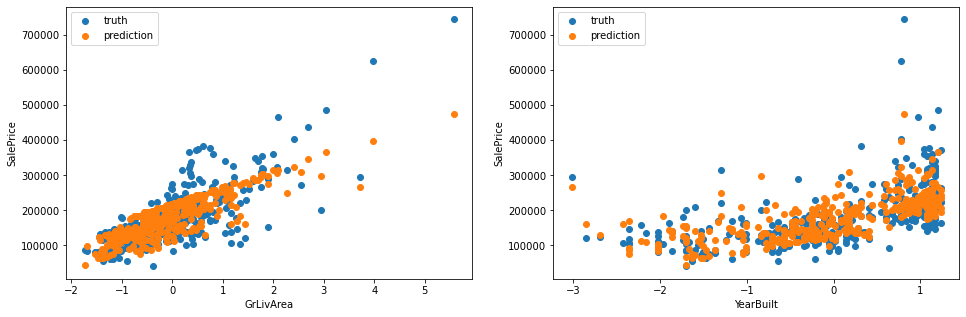

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 学習
reg = LinearRegression().fit(X_train, y_train)

# 推定
y_pred = reg.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
eval_dict = {"MSE": [mse], "RMSE": [rmse], "MAE": [mae]}
eval_df1 = pd.DataFrame(eval_dict, index=["LinearRegression"])
display(eval_df1)

# 描画
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_test, label="truth")
plt.scatter(X_test[:, 0], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(122)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test, label="truth")
plt.scatter(X_test[:, 1], y_pred, label="prediction")
plt.legend()

plt.show()

## 3-2. SVM

,MSE,RMSE,MAE
SVR,6.835916e+09,82679.596542,55552.015338


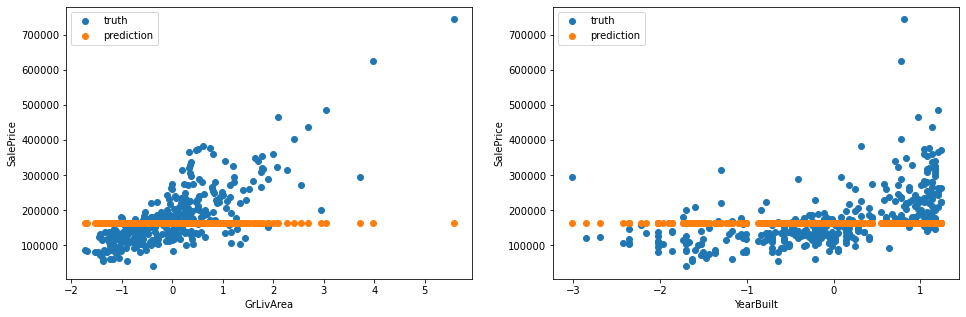

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 学習
y_train_ravel = y_train.ravel() # SVRでは一次配列でないとエラーを吐いた
regr = SVR(C=1.0, epsilon=0.1).fit(X_train, y_train_ravel)

# 推定
y_pred = regr.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
eval_dict = {"MSE": [mse], "RMSE": [rmse], "MAE": [mae]}
eval_df2 = pd.DataFrame(eval_dict, index=["SVR"])
display(eval_df2)

# 描画
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_test, label="truth")
plt.scatter(X_test[:, 0], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(122)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test, label="truth")
plt.scatter(X_test[:, 1], y_pred, label="prediction")
plt.legend()

plt.show()

In [19]:
y_pred[:10] # グラフで見れない値の変動の確認

array([165113.31589979, 164868.66083334, 164653.90274449, 164687.47522799,
       164656.38056279, 165093.94026403, 165053.824064  , 164949.20866702,
       165120.66333184, 165035.68725419])

## 3-3. 決定木

,MSE,RMSE,MAE
DecisionTree,2.547731e+09,50475.052146,35341.568037


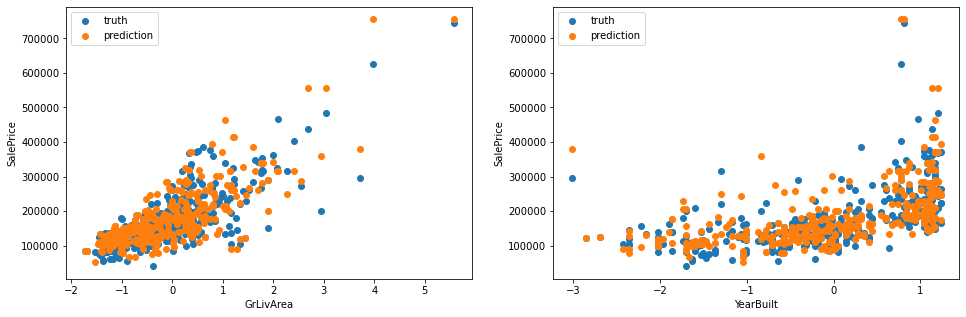

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 学習
regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)

# 推定
y_pred = regressor.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
eval_dict = {"MSE": [mse], "RMSE": [rmse], "MAE": [mae]}
eval_df3 = pd.DataFrame(eval_dict, index=["DecisionTree"])
display(eval_df3)

# 描画
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_test, label="truth")
plt.scatter(X_test[:, 0], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(122)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test, label="truth")
plt.scatter(X_test[:, 1], y_pred, label="prediction")
plt.legend()

plt.show()

## 3-4. ランダムフォレスト

,MSE,RMSE,MAE
RandomForest,1.721306e+09,41488.630597,28549.365865


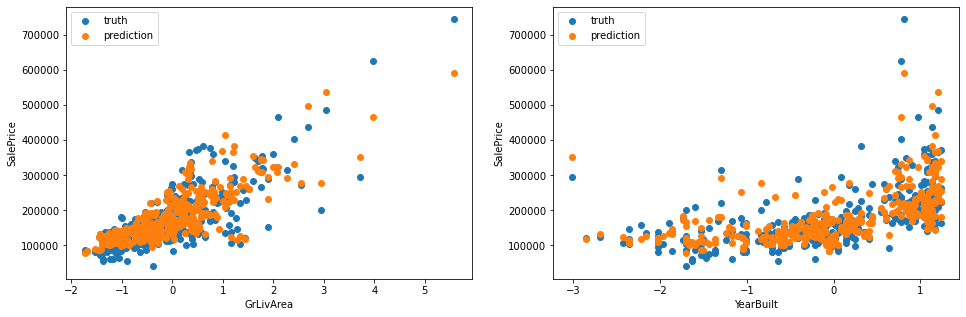

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 学習
y_train_ravel = y_train.ravel() # RFでは一次配列でないとエラーを吐いた
regr = RandomForestRegressor(random_state=1).fit(X_train, y_train_ravel)

# 推定
y_pred = regr.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
eval_dict = {"MSE": [mse], "RMSE": [rmse], "MAE": [mae]}
eval_df4 = pd.DataFrame(eval_dict, index=["RandomForest"])
display(eval_df4)

# 描画
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_test, label="truth")
plt.scatter(X_test[:, 0], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(122)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test, label="truth")
plt.scatter(X_test[:, 1], y_pred, label="prediction")
plt.legend()

plt.show()

In [22]:
pd.concat([eval_df1, eval_df2, eval_df3, eval_df4])

,MSE,RMSE,MAE
LinearRegression,1.886786e+09,43437.144818,29912.677209
SVR,6.835916e+09,82679.596542,55552.015338
DecisionTree,2.547731e+09,50475.052146,35341.568037
RandomForest,1.721306e+09,41488.630597,28549.365865


## 3-5. 考察
* 指標値はランダムフォレスト＞決定木＞線形回帰＞SVMの順で良い評価（誤差が小さい）
* 散布図の結果も同様
  + SVMは特に学習が進んでいない様子が見て取れる

# 【問題4】（アドバンス課題）他の特徴量も使用しての学習

## 4-1. 欠損処理

### 4-1-1. 欠損値削除

In [23]:
# データのリロード

train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [24]:
# 欠損値一覧

na_sum = train.isna().sum()
na_ratio = (na_sum / len(train) * 100).round(2)
na_dict = {"Total": na_sum, "Missing_ratio": na_ratio}
na_df = pd.DataFrame.from_dict(na_dict)
na_df = na_df[na_df["Total"]!=0]
na_df = na_df.sort_values(by="Total", ascending=False)
na_df

,Total,Missing_ratio
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [25]:
# 上位５件削除

na_df_columns = na_df[:5].index
train.drop(na_df_columns, axis=1, inplace=True)

In [26]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 4-1-2. 欠損値穴埋め

In [27]:
# 今回は強引にffill

train = train.fillna(method="ffill")

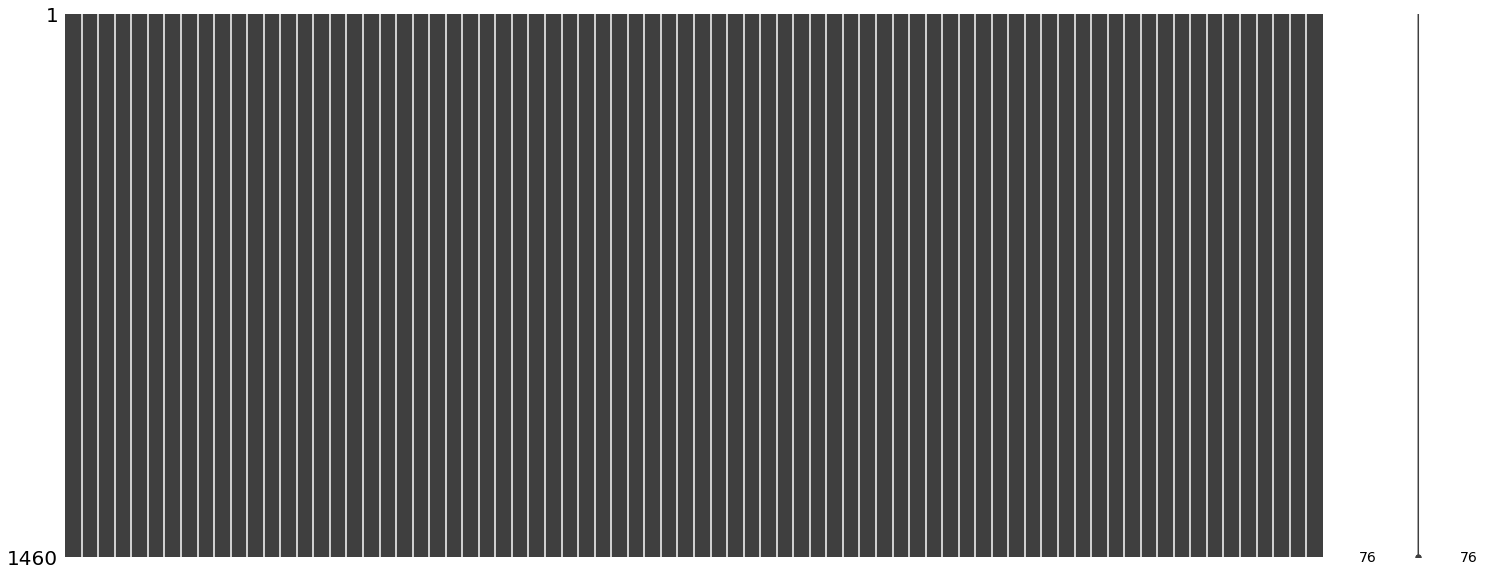

In [28]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(train)

plt.show()

## 4-2. 前処理

### 4-2-1. テキストデータ変換

In [29]:
# テキストデータ抽出

train_object = train.select_dtypes(include="object")
train_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [30]:
# テキストデータをカテゴリカル変数に変換

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_object_encoded = ordinal_encoder.fit_transform(train_object)
train_object_encoded[:2]

array([[ 3.,  1.,  3.,  3.,  0.,  4.,  0.,  5.,  2.,  2.,  0.,  5.,  1.,
         1., 12., 13.,  1.,  2.,  4.,  2.,  2.,  3.,  3.,  2.,  5.,  1.,
         0.,  1.,  4.,  2.,  6.,  1.,  1.,  4.,  4.,  2.,  8.,  4.],
       [ 3.,  1.,  3.,  3.,  0.,  2.,  0., 24.,  1.,  2.,  0.,  2.,  1.,
         1.,  8.,  8.,  2.,  3.,  4.,  1.,  2.,  3.,  1.,  0.,  5.,  1.,
         0.,  1.,  4.,  3.,  6.,  1.,  1.,  4.,  4.,  2.,  8.,  4.]])

In [31]:
# DataFrame型に戻す

train_object_encoded_df = pd.DataFrame(data=train_object_encoded, index=train_object.index, columns=train_object.columns)
train_object_encoded_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


In [32]:
# 元データに重ねる

train.update(train_object_encoded_df)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


### 4-2-2. 検証データ分割

In [33]:
X = train.iloc[:, :-1]
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4


In [34]:
y = train.iloc[:, -1]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_ndarray = X.values
y_ndarray = y.values

X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, test_size=0.25, random_state=1)

### 4-2-3. 標準化

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# DFに戻す

dfs = pd.DataFrame(X_train, columns=X.columns)
dfs.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.708835,-0.873173,-0.076430,0.199599,-0.050850,0.052414,0.758741,0.310005,-0.030234,0.616254,-0.217852,1.457336,-0.041313,-0.037426,-0.411558,-0.548213,1.360274,-0.540582,1.071350,0.947089,-0.494112,-0.12648,0.712914,0.727087,1.959178,0.488671,-0.760951,0.372669,0.809971,-2.663314,0.290328,-1.932665,-0.390500,1.972617,0.293289,-0.275830,-0.568143,1.365236,-0.124409,-0.857807,0.257317,0.295575,1.297197,-0.787100,-0.111643,0.323209,1.077038,-0.245115,0.788753,-0.754854,0.145149,-0.214294,-0.390717,0.274899,0.249929,0.583643,-0.697952,1.008216,-0.217899,0.307432,0.761337,0.242793,0.202922,0.291012,1.287723,0.150059,-0.364415,-0.117811,-0.283044,-0.066847,-0.090611,0.634747,-0.621957,0.318699,0.215674
1,0.173580,0.314707,-0.076430,3.016320,1.060991,0.052414,0.758741,0.310005,-0.030234,0.616254,-0.217852,-1.529778,-0.041313,-0.037426,-0.411558,1.027360,-0.828022,0.345552,-1.599797,0.898560,-0.494112,-0.12648,1.028325,1.014509,0.370067,-0.588514,0.680643,0.372669,-0.546173,0.870202,0.290328,-1.069234,-0.390500,1.843438,0.293289,-0.275830,-1.245412,0.565740,-0.124409,-0.857807,0.257317,0.295575,-0.259108,0.372558,-0.111643,0.100410,3.000947,-0.245115,-1.048873,1.256254,0.145149,-0.214294,-0.390717,-0.334441,0.249929,0.583643,-0.697952,-2.202460,-0.217899,0.307432,0.249369,0.242793,0.202922,0.291012,-0.777481,3.923155,-0.364415,-0.117811,-0.283044,-0.066847,-0.090611,-0.481497,0.891472,0.318699,0.215674
2,0.521392,0.789859,-1.717437,0.485354,-0.340912,0.052414,-1.362504,-2.495415,-0.030234,0.616254,-0.217852,-1.031926,-0.041313,-0.037426,1.248316,1.027360,-0.098590,0.345552,-0.841323,-1.722000,-0.494112,-0.12648,-0.548728,-0.710025,-1.219044,1.861213,0.680643,0.372669,-0.546173,-0.307636,0.290328,0.657626,0.710137,0.067238,0.293289,-0.275830,-0.168958,-0.196210,-0.124409,1.441577,-3.886250,-2.611500,-0.491803,1.465489,-0.111643,0.821675,-0.846871,-0.245115,0.788753,-0.754854,1.367746,4.478754,0.814452,0.884239,0.249929,-0.952628,-0.697952,-1.290786,1.031313,0.307432,0.078713,0.242793,0.202922,0.291012,-0.777481,-0.693339,-0.364415,-0.117811,-0.283044,-0.066847,-0.090611,0.634747,-0.621957,0.318699,0.215674
3,0.721149,-0.873173,-0.076430,0.730286,0.248363,0.052414,0.758741,0.310005,-0.030234,-1.828666,-0.217852,1.125434,-0.041313,-0.037426,-0.411558,-0.548213,-0.828022,-1.426716,-0.478575,0.704445,-0.494112,-0.12648,1.028325,1.014509,-2.808155,-0.200496,0.680643,0.372669,-0.546173,0.870202,0.290328,0.657626,0.710137,-0.613101,-4.151719,3.929625,-0.642149,0.146115,-0.124409,-0.857807,0.257317,0.295575,1.569926,-0.787100,-0.111643,0.529015,1.077038,-0.245115,0.788753,-0.754854,0.145149,-0.214294,0.814452,0.884239,-6.164258,0.583643,-0.697952,-0.854769,-0.217899,0.307432,0.040789,0.242793,0.202922,0.291012,-0.777481,-0.693339,-0.364415,-0.117811,-0.283044,-0.066847,-0.090611,-1.969822,-1.378671,0.318699,0.215674
4,-0.075529,-0.873173,-0.076430,0.403710,-0.098472,0.052414,0.758741,0.310005,-0.030234,0.616254,-0.217852,0.295680,-0.041313,-0.037426,-0.411558,-0.548213,0.630842,-0.540582,-0.082849,-0.799951,1.894641,-0.12648,-1.179549,-1.284870,-1.219044,0.384427,0.680643,0.372669,-0.546173,0.870202,0.290328,0.657626,1.260455,-0.974800,0.293289,-0.275

## 4-3. 特徴選択

### 4-3-1. PCA

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=75)
pca.fit(X_train)
evr = pca.explained_variance_ratio_

In [39]:
# 主成分得点

feature = pca.transform(X_train)
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75
0,4.265916,-1.624648,0.839230,-1.718528,0.925717,-1.294117,-0.075521,-0.794529,-0.761749,0.077732,0.091270,0.942301,-0.301355,-0.915008,0.325379,-0.226808,-0.730672,-0.436812,-0.094922,-1.005377,-0.156493,0.348960,0.207299,-0.713135,0.170136,0.787397,-0.178258,1.962979,0.385414,0.126328,-0.602874,0.444181,0.591827,-0.306934,0.197275,-0.671976,1.500704,-0.325968,0.495222,0.056641,0.204580,-0.162634,-0.220956,-0.517796,0.089058,-0.857917,0.841616,-0.984321,-0.264524,0.582301,0.407130,0.404494,0.977349,-0.173862,0.672209,-0.356309,0.294891,-0.261818,0.057502,-0.000857,-0.132525,0.169135,-0.402393,-0.243650,0.399629,0.055550,-0.287686,-0.107789,-0.039448,-0.146080,0.054603,-0.063246,0.275968,-3.628768e-16,-5.759580e-16
1,0.459101,-0.097166,2.108057,1.032410,-1.359986,-2.425977,-0.415909,-2.328600,-1.322838,0.619749,0.938864,0.943207,-1.425855,0.293064,1.888289,-0.287906,0.619924,0.541371,-0.426100,0.688608,0.290041,0.025355,1.455711,-0.959490,-0.134507,-1.179642,-0.046564,1.375704,-1.701033,0.610934,0.360223,-0.920881,-1.246581,1.085554,0.808125,1.049834,-0.020072,1.367660,-0.094827,-0.616797,1.252817,0.488190,-0.101408,1.082156,0.617785,1.536339,-1.265428,0.121951,1.340955,1.226402,0.943845,0.109961,-0.909932,-0.903446,-0.481623,0.738289,-0.233334,-0.043357,-0.833485,-0.086260,-0.169867,0.971451,0.777574,-0.392348,-0.983765,0.928290,-0.291460,-0.543101,-0.128250,-0.365063,-0.621756,-0.729679,0.144258,1.197140e-15,8.483416e-16
2,-1.718153,3.462667,-0.491334,1.900878,3.202597,1.555618,2.646179,-1.671218,0.165531,-0.870677,0.503716,-0.143102,1.491310,0.878989,-0.579823,-1.010417,0.237496,0.314647,-0.242333,-0.013468,0.249874,0.162622,1.343391,-0.851625,-1.390834,1.372324,1.278462,-0.591027,1.068415,0.532002,-0.491039,-0.015964,-0.239440,-1.797116,-0.321677,0.488474,-1.516212,-0.080454,-2.102095,-1.167186,0.794991,-0.016619,0.324018,-0.495601,-1.360439,0.633528,-0.615423,1.385112,-0.350985,1.580399,-0.474384,0.615106,1.116529,-1.846080,-0.463121,-1.271671,0.622048,0.287318,-0.036730,0.053837,0.145699,-0.003058,0.480825,-0.011580,0.542067,-0.080328,-0.442594,-0.534568,0.076251,0.606396,1.092215,-0.750659,0.233433,8.537226e-16,-1.716553e-16
3,-0.123901,0.146025,3.007818,-0.425168,-0.865992,-0.305094,3.876534,4.227792,-3.654229,-0.432168,-1.467504,-2.019541,-1.431435,-0.724107,0.179053,0.591203,-0.914671,0.009261,0.784450,-0.363913,-0.197542,-0.341194,-1.644049,1.948094,-0.438530,-1.722171,0.792080,0.369349,-2.664558,-1.700071,0.292493,-1.148331,-0.174179,-0.130747,-1.868115,1.207701,-0.716490,-0.960872,-1.348891,-0.708593,-0.475028,-0.467036,-2.040655,-1.230946,-0.861783,0.417105,-1.517803,-0.629930,-0.635458,-0.337843,-0.572754,1.077929,-0.522168,-0.798924,0.520523,0.305454,0.002105,-0.103950,0.112727,-0.428897,-0.027531,0.330372,0.144976,-0.248263,-0.892981,0.329131,-0.130269,0.505254,-0.199731,0.068271,-0.405565,-0.246683,0.065337,1.403463e-15,2.190864e-15
4,-1.248133,0.179234,0.275638,-0.783516,0.177802,4.640221,-0.172909,0.748745,0.480675,-0.208691,0.756546,-0.044355,-0.752316,1.284825,-0.539938,-1.889675,0.906359,-0.643869,-0.328967,-0.619444,0.382876,0.036560,-0.914027,-0.071231,0.455424,-0.522186,-1.006646,-0.742244,-1.077382,0.323817,-0.262144,0.090975,0.380434,1.467278,1.605018,-1.869010,-0.147019,-0.806328,-1.151581,0.135703,-0.035548,-0.457748,-0.320931,-0.606847,1.005730,1.278292,0.265316,0.637028,0.221146,-1.019027,0.213049,0.010233,-0.152799,-0.416971,-0.092583,-0.367344,-0.300085,-0.585495,0.101339,-0.398291,0.433152,0.118517,0.387983,0.168683,0.302350,-0.102408,-0.617603,0.015954,-0.052838,-0.231932,-0.225541,-0.258651,0.017475,-2.471617e-16,3.937524e-16


In [40]:
# 寄与率

pd.DataFrame(evr, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,1.360988e-01
PC2,5.547603e-02
PC3,4.940993e-02
PC4,3.916333e-02
PC5,3.069897e-02
...,...
PC71,1.301985e-03
PC72,1.158657e-03
PC73,1.016136e-03
PC74,2.684076e-32


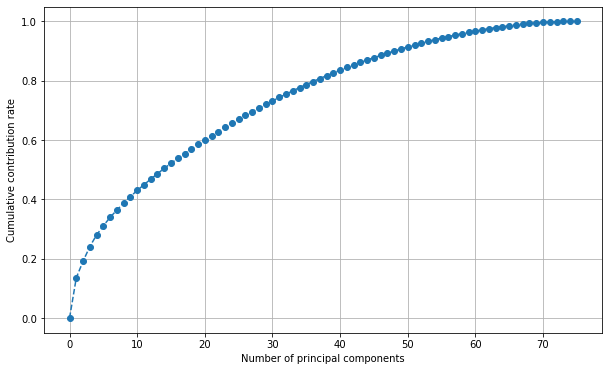

In [41]:
# 累積寄与率の推移

import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(evr)), "--o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [42]:
# 固有値

pd.DataFrame(evr, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,1.360988e-01
PC2,5.547603e-02
PC3,4.940993e-02
PC4,3.916333e-02
PC5,3.069897e-02
...,...
PC71,1.301985e-03
PC72,1.158657e-03
PC73,1.016136e-03
PC74,2.684076e-32


In [43]:
# 固有ベクトル

pd.DataFrame(pca.components_, columns=dfs.columns[0:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
PC1,-1.065393e-03,-1.067366e-02,-8.640311e-02,1.014959e-01,6.765858e-02,9.528318e-03,-8.978190e-02,2.706541e-02,-3.226008e-03,-1.244213e-02,6.092909e-03,6.233296e-02,5.257322e-02,7.312032e-03,1.058630e-02,7.599614e-02,2.547767e-01,-8.426826e-02,2.403859e-01,2.013011e-01,6.245296e-02,2.210096e-02,4.507590e-02,3.821748e-02,-6.885316e-03,1.602234e-01,-2.242445e-01,6.202396e-02,1.758343e-01,-2.056364e-01,3.056812e-02,-1.052731e-01,-2.876080e-02,0.128541,2.532328e-02,-0.017362,0.081081,0.205490,-5.019107e-02,-1.530274e-01,1.061797e-01,1.109431e-01,0.193819,0.072365,-0.016935,0.204157,7.408935e-02,-1.517794e-02,2.120692e-01,8.915142e-02,4.072162e-02,-3.891709e-02,-1.854060e-01,1.528921e-01,3.156553e-02,1.302035e-01,-1.466834e-01,2.178621e-01,-1.998231e-01,2.302396e-01,2.246345e-01,7.709498e-02,7.800940e-02,1.049930e-01,1.049603e-01,1.088865e-01,-8.116254e-02,1.353174e-02,1.906725e-02,2.484883e-02,-8.861317e-03,1.148079e-02,4.135797e-03,-2.029198e-02,8.365248e-02
PC2,6.752441e-03,1.117243e-02,3.662124e-02,1.003688e-01,8.754464e-02,2.963195e-02,5.902362e-03,-9.068562e-02,8.258569e-03,-4.163437e-02,1.244161e-02,3.993446e-02,-4.007886e-02,7.836316e-03,-1.635130e-01,6.788979e-02,6.580524e-02,4.334957e-02,-2.018215e-01,-8.162837e-02,1.977087e-02,6.762566e-02,3.573960e-02,5.539860e-02,8.903669e-03,3.552850e-02,-1.059189e-02,-5.713472e-02,-9.873605e-02,3.397300e-02,-7.932578e-02,1.371252e-01,2.035956e-01,-0.143441,5.764475e-02,-0.054369,0.154439,-0.014523,8.777385e-02,2.527644e-02,-1.347001e-01,-8.656735e-02,0.048236,0.327963,0.116362,0.315724,-1.851293e-01,5.029277e-04,1.467630e-01,1.365380e-01,3.347041e-01,1.447150e-01,-2.946451e-02,3.498906e-01,-4.766305e-02,9.452323e-02,1.327472e-01,-1.513715e-01,7.463135e-02,3.646714e-02,3.080584e-02,-1.416843e-01,-1.150304e-01,-1.484113e-01,-2.632541e-02,8.838744e-02,1.279124e-01,-2.635353e-02,5.737343e-02,6.386388e-02,1.288455e-02,2.542809e-02,-4.045673e-02,-1.253139e-02,-2.799677e-02
PC3,-1.986023e-02,-2.427510e-01,5.497210e-02,2.104356e-01,2.531326e-01,-1.129247e-02,-8.624390e-02,-8.054657e-02,3.496600e-02,-8.116655e-02,1.708566e-01,2.172888e-02,-1.354862e-02,2.216629e-02,-2.100053e-01,-1.245987e-01,-4.157733e-02,8.375547e-02,-1.279765e-01,-1.441164e-01,1.203262e-01,1.108748e-01,-1.172349e-01,-1.097732e-01,-2.944717e-02,5.937260e-02,8.018709e-02,-5.228123e-02,-1.632220e-01,7.826551e-02,1.216388e-02,-7.375585e-02,-2.104782e-01,0.267973,-1.768741e-01,0.202653,-0.128013,0.221404,-1.946409e-02,1.516464e-01,4.457927e-02,-1.102127e-02,0.263200,-0.152313,0.015036,0.074945,2.101882e-01,7.893137e-02,-9.949929e-02,-1.088925e-01,4.110508e-02,-3.647512e-02,4.955999e-02,4.042006e-02,-6.554875e-02,1.789949e-01,-6.462623e-02,-1.777411e-01,4.303479e-02,4.678101e-03,5.936161e-02,2.759783e-03,-5.321434e-03,4.186539e-02,7.421081e-02,-3.156442e-03,6.261451e-02,2.187307e-02,9.218222e-02,9.154082e-02,2.268162e-02,1.333955e-02,1.817018e-02,-1.686181e-02,-5.253564e-02
PC4,1.428539e-02,2.971222e-01,-5.582218e-02,-8.523604e-02,-3.381069e-03,-5.071191e-03,-3.420653e-02,3.652508e-02,2.528211e-02,1.071582e-03,3.777379e-02,1.884995e-02,2.386303e-02,-2.706659e-02,1.444673e-01,3.521293e-01,-3.696554e-02,2.533555e-02,4.651073e-02,-4.387640e-02

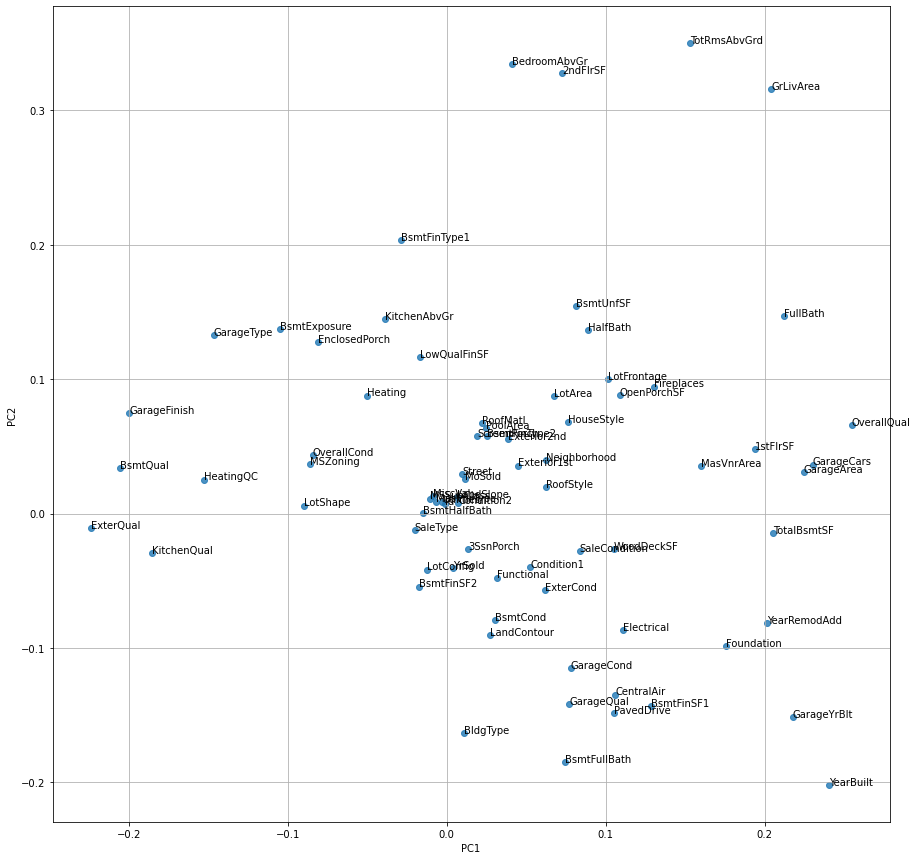

In [44]:
# 第一主成分と第二主成分における、各特徴量の寄与率の分布

plt.figure(figsize=(15, 15))
for x, y, name in zip(pca.components_[0], pca.components_[1], dfs.columns[:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

* 特徴量の数が多いままPCAを適用したので、第一主成分と第二主成分だけでは寄与率が不十分かと思われる。
  + （他の成分を利用しないことによる情報の損失が大きい）
* その上で、２成分で寄与率の高い GrLivArea, TotRmsAbvGrd, FullBath, BedroomAbvGr, 2ndFlrSF,  それと YearBuilt を使って学習を行いたい。

### 4-3-2. 特徴抽出〜

In [45]:
X_train = dfs[["GrLivArea", "YearBuilt", "TotRmsAbvGrd", "FullBath", "BedroomAbvGr", "2ndFlrSF"]].values
X_train

array([[ 0.32320933,  1.07134974,  0.27489857,  0.78875272,  0.1451486 ,
        -0.78709976],
       [ 0.1004104 , -1.59979674, -0.33444138, -1.04887329,  0.1451486 ,
         0.37255803],
       [ 0.82167474, -0.84132305,  0.88423852,  0.78875272,  1.36774642,
         1.46548949],
       ...,
       [-0.31686557, -1.89659079,  0.27489857, -1.04887329,  0.1451486 ,
         0.55202888],
       [-1.01169614, -0.01689513, -0.94378133, -1.04887329, -1.07744922,
         0.37255803],
       [-1.18729191, -1.20407134, -0.33444138, -1.04887329, -1.07744922,
        -0.78709976]])

In [46]:
dfs_test = pd.DataFrame(X_test, columns=X.columns)
X_test = dfs_test[["GrLivArea", "YearBuilt", "TotRmsAbvGrd", "FullBath", "BedroomAbvGr", "2ndFlrSF"]].values
X_test

array([[ 0.50824573,  0.97241838,  0.27489857,  0.78875272,  0.1451486 ,
         1.12035324],
       [ 1.26349635, -1.07216287,  0.88423852,  0.78875272,  1.36774642,
         0.86955423],
       [-1.17596315, -0.14880359, -0.94378133, -1.04887329,  0.1451486 ,
        -0.78709976],
       ...,
       [-0.2979843 , -0.04987224,  0.27489857, -1.04887329,  0.1451486 ,
         0.59344523],
       [ 0.27411804,  1.03837262,  0.88423852,  0.78875272,  0.1451486 ,
        -0.78709976],
       [ 1.05202618, -0.08284936,  1.49357848, -1.04887329,  2.59034425,
         1.6058449 ]])

,MSE,RMSE,MAE
Score,1.631783e+09,40395.338216,27902.778663


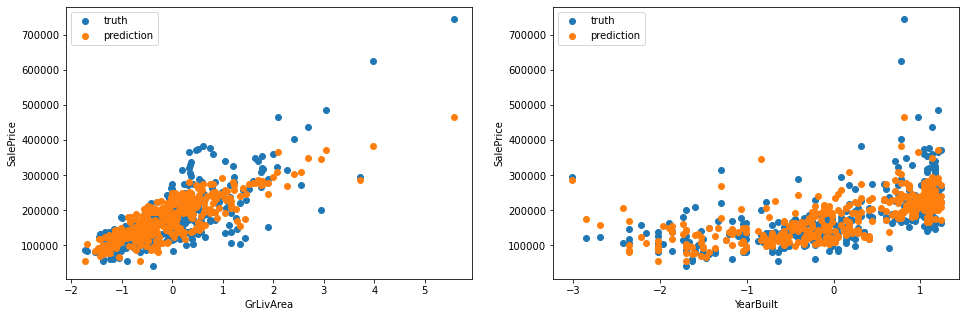

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 学習
reg = LinearRegression().fit(X_train, y_train)

# 推定
y_pred = reg.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
eval_dict = {"MSE": [mse], "RMSE": [rmse], "MAE": [mae]}
eval_df = pd.DataFrame(eval_dict, index=["Score"])
display(eval_df)

# 描画
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 0], y_test, label="truth")
plt.scatter(X_test[:, 0], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(122)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 1], y_test, label="truth")
plt.scatter(X_test[:, 1], y_pred, label="prediction")
plt.legend()

plt.show()

* ２変数の回帰分析より、６変数の方がより誤差の値が小さくなり、予測精度が向上していると言える。
* ただ視覚的には大きな変化は感じないので、元の２変数でも十分に説明ができていたとも言える。

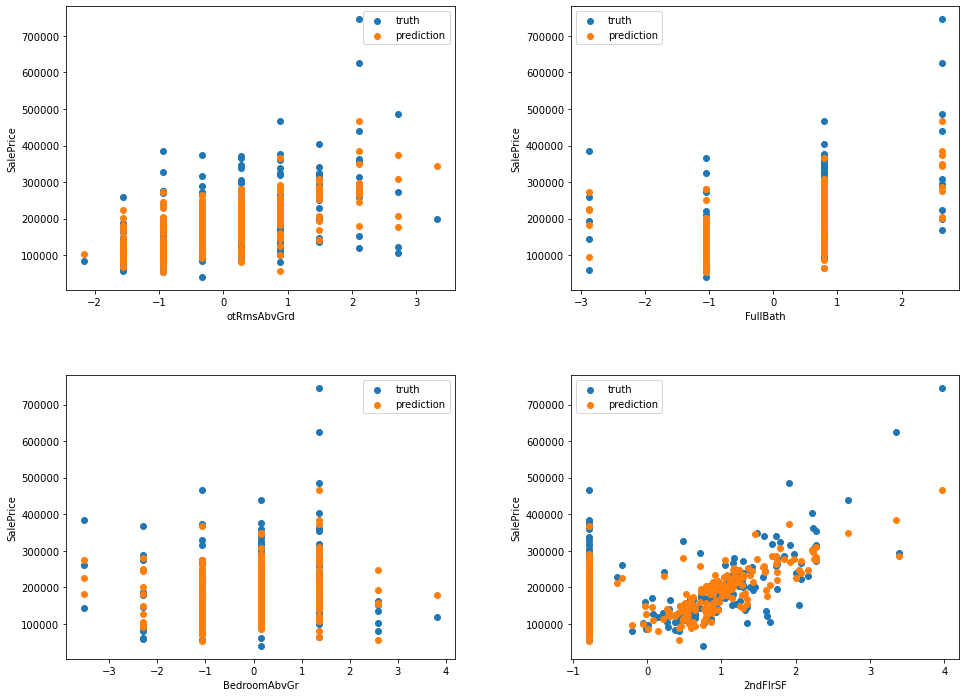

In [48]:
# TotRmsAbvGrd, FullBath, BedroomAbvGr, 2ndFlrSF も見てみる

plt.figure(figsize=(16, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = plt.subplot(221)
plt.xlabel("otRmsAbvGrd")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 2], y_test, label="truth")
plt.scatter(X_test[:, 2], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(222)
plt.xlabel("FullBath")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 3], y_test, label="truth")
plt.scatter(X_test[:, 3], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(223)
plt.xlabel("BedroomAbvGr")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 4], y_test, label="truth")
plt.scatter(X_test[:, 4], y_pred, label="prediction")
plt.legend()

ax = plt.subplot(224)
plt.xlabel("2ndFlrSF")
plt.ylabel("SalePrice")
plt.scatter(X_test[:, 5], y_test, label="truth")
plt.scatter(X_test[:, 5], y_pred, label="prediction")
plt.legend()


plt.show()